In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
predictedTest = [287.9464, 393.2149, 543.8526, 318.7714]
revenues = [20, 100, 175, 13, 37, 136, 245, 26, 75, 155, 326, 48, 92, 202, 384, 82, 176, 282, 445, 181]
popularity = pd.read_csv('csv/popularityApp.csv')

In [5]:
def calculateWeights(period, past):
    n = len(past)
    if (n<2*period):
        return math.nan
    v = past[(n-2*period):(n-period)]
    for i in range(2,period+1):
        v = v + past[(n-2*period+i-1):(n-period+i-1)]
    M = np.array(v).reshape(period, period)
    v = past[(n-period):n]
    return np.linalg.solve(M, v)

[1.0080186  0.13742887 0.12600184 0.08679208]


In [6]:
a = calculateWeights(5, revenues)
print(a)

[ 2.6149446   1.36008688  0.44019604  0.06909441 -2.31825838]


In [7]:
def linearCombinationForecasting(period):
    def result(past):
        n = len(past)
        if (n<2*period):
            return math.nan
        a = calculateWeights(period, past)
        return (past[(n-period):n]*a).sum()
    return result

In [8]:
forecast = linearCombinationForecasting(4)
print(forecast(revenues))

287.94640003946205


In [9]:
past = revenues
predicted = [ ]
for i in range(0,4):
    forecast = linearCombinationForecasting(4)
    next = forecast(past)
    predicted = predicted + [next]
    past = past + [next]

for i in predicted:
    print(i)

287.94640003946205
393.2148920003018
543.8526167534402
318.7714138014861


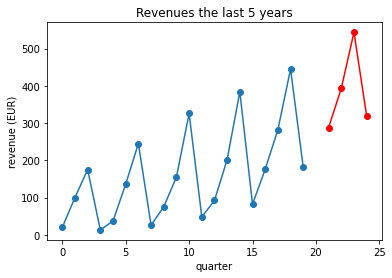

In [10]:
plt.figure()
plt.plot(range(0,20), revenues, 'o-')
plt.plot(range(21, 25), predicted, 'or-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Revenues the last 5 years')
plt.show()

In [14]:
def general_regression(x, y, degree=1, exp=False):
    func=lambda x:x # def fun(x): return[x]
    inv_func=lambda x:x
    if (exp):
        func=np.exp
        inv_func=np.log
    model = np.polyfit(x, inv_func(y), degree)
    line = np.poly1d(model)
    predict = lambda x:func(line(x))
    yyy = pd.series(predict(x))
    se = math.sqrt(((yyy-y)**2).mean())
    R2 = (x.corr(inv_func(y)))**2
    result = [se, R2, predict]
    index = ['se', 'R2', 'predict']
    for i in range(1,len(model)+1):
        result = np.append(result, model[-i])
        index += chr(i+96) # to obtain the characters a,b,...
    result = pd.series(result)
    result.index = index
    return result

def trendForecastingModel(past):
    n=len(past)
    x=pd.Series(range(0,n))
    y=pd.Series(past)
    reg=general_regression(x,y)
    return reg.predict

In [19]:
print(trendForecastingModel(popularity['downloads']))

<function general_regression.<locals>.<lambda> at 0x00000237E7E1CF70>
